In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

path = '/Users/hsy/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

In [4]:
filename = '../data/mpg.csv'
mpg = pd.read_csv(filename, encoding='utf-8')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


Text(0, 0.5, '값')

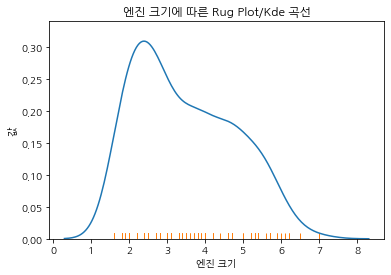

In [6]:
ax = plt.subplots()
sns.kdeplot(data=mpg, x="displ")
ax = sns.rugplot(data=mpg, x="displ")
ax.set_title('엔진 크기에 따른 Rug Plot/Kde 곡선')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('값')

Text(0, 0.5, '주행 마일수')

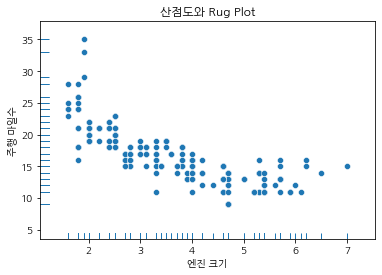

In [7]:
ax = plt.subplots()
sns.scatterplot(data=mpg, x='displ', y='cty')
ax = sns.rugplot(data=mpg, x='displ', y='cty')
ax.set_title('산점도와 Rug Plot')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('주행 마일수')

Text(0, 0.5, '')

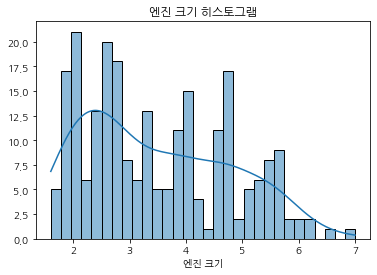

In [15]:
ax = plt.subplots()
ax = sns.histplot(data=mpg, x='displ', kde=True, bins=30)
ax.set_title('엔진 크기 히스토그램')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('')

In [16]:
label_dict = {'f': '전륜 구동', '4': '사륜 구동', 'r': '후륜 구동'}

def setLabel(x):
    return label_dict[x]
idx = 0
mpg['drv'] = mpg['drv'].apply(setLabel)

result = mpg.groupby('drv')['drv'].count()
result

drv
사륜 구동    103
전륜 구동    106
후륜 구동     25
Name: drv, dtype: int64

Text(0, 0.5, '')

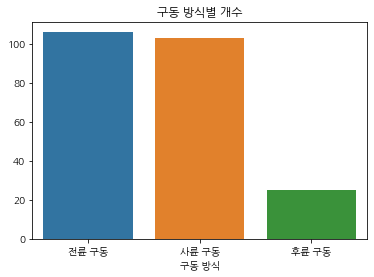

In [18]:
plt.figure()
ax = sns.countplot(data=mpg, x='drv')
ax.set_title('구동 방식별 개수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('')

Text(0, 0.5, '')

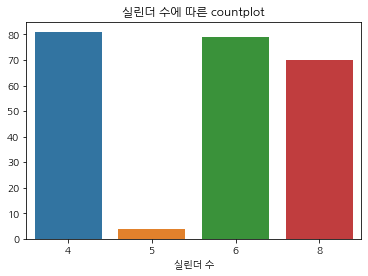

In [20]:
plt.figure()
ax = sns.countplot(data=mpg, x='cyl')
ax.set_title('실린더 수에 따른 countplot')
ax.set_xlabel('실린더 수')
ax.set_ylabel('')

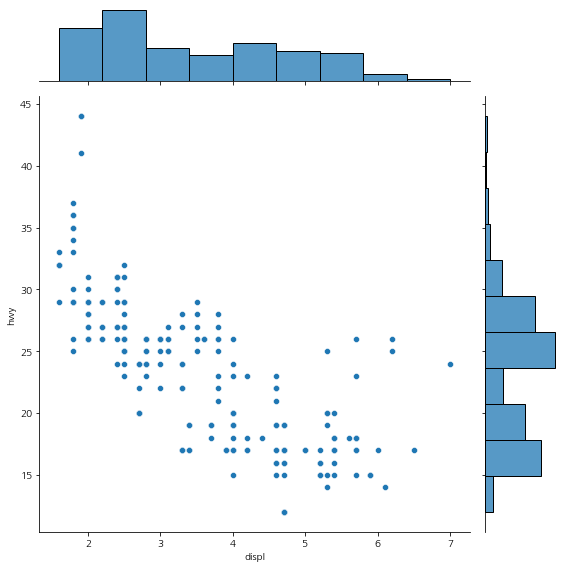

In [26]:
sns.jointplot(x='displ', y='hwy', data=mpg, height=8)

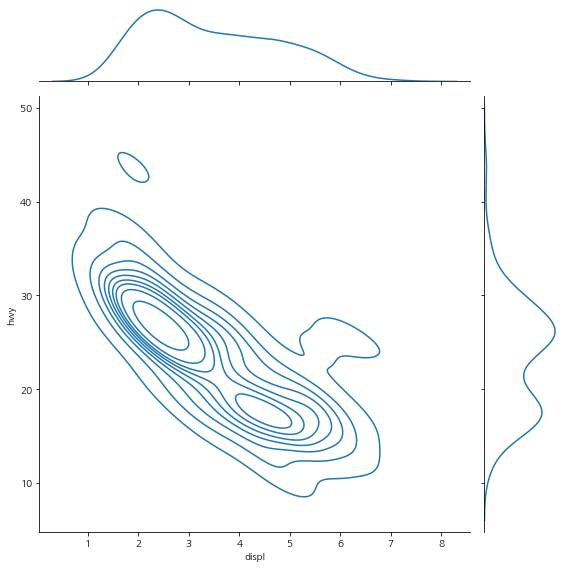

In [27]:
sns.jointplot(x='displ', y='hwy', data=mpg, height=8, kind='kde')

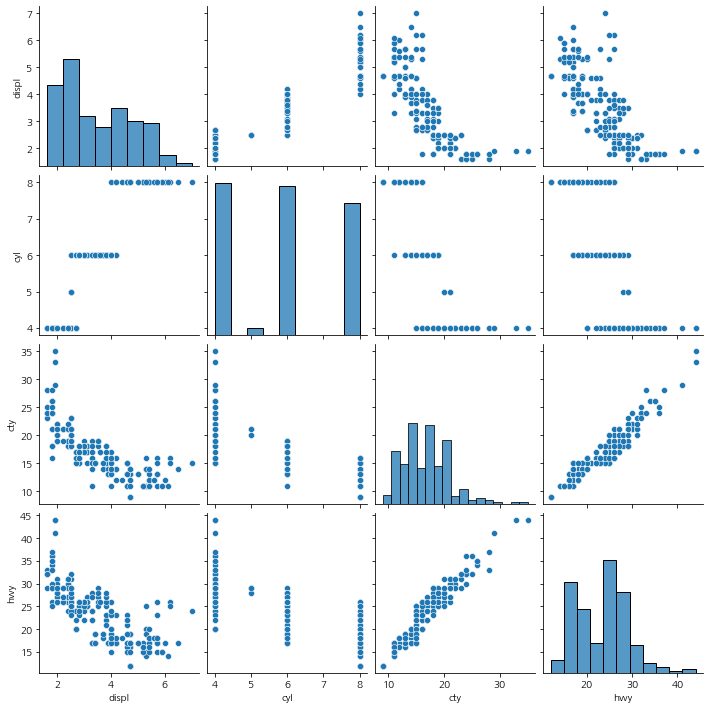

In [28]:
newmpg = mpg[['displ', 'cyl', 'cty', 'hwy']]
sns.pairplot(data=newmpg)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


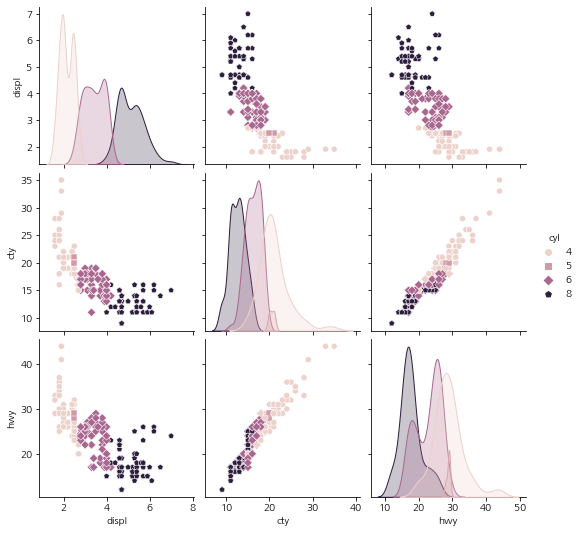

In [29]:
sns.pairplot(data=newmpg, hue='cyl', markers=['o', 's', 'D', 'p'])

In [31]:
mpg_size = mpg.pivot_table(index='drv', columns='cyl', aggfunc='size', fill_value=0)

<AxesSubplot:xlabel='cyl', ylabel='drv'>

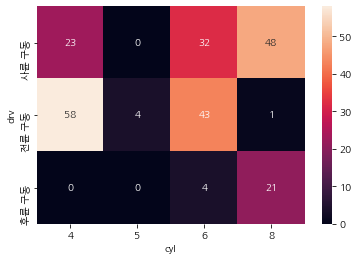

In [33]:
sns.heatmap(mpg_size, annot=True, fmt='d')

<AxesSubplot:xlabel='drv', ylabel='hwy'>

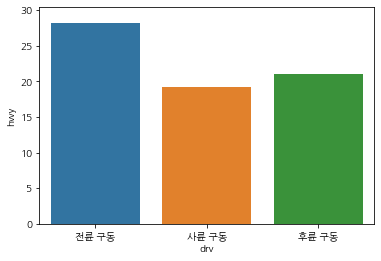

In [34]:
sns.barplot(x='drv', y='hwy', data=mpg, errwidth=0)

<AxesSubplot:xlabel='drv', ylabel='hwy'>

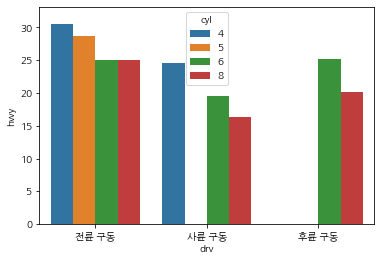

In [35]:
sns.barplot(x='drv', y='hwy', data=mpg, errwidth=0, hue='cyl')

In [37]:
mpg.groupby('drv')['hwy'].describe()

,count,mean,std,min,25%,50%,75%,max
drv,,,,,,,,
사륜 구동,103.0,19.174757,4.078704,12.0,17.0,18.0,22.0,28.0
전륜 구동,106.0,28.160377,4.206881,17.0,26.0,28.0,29.0,44.0
후륜 구동,25.0,21.000000,3.662877,15.0,17.0,21.0,24.0,26.0


<AxesSubplot:xlabel='drv', ylabel='hwy'>

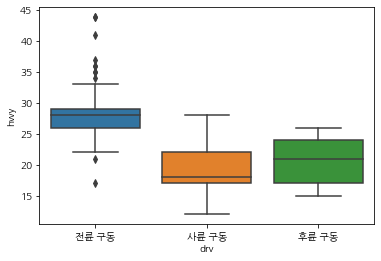

In [39]:
sns.boxplot(x='drv', y='hwy', data=mpg)

<AxesSubplot:xlabel='drv', ylabel='hwy'>

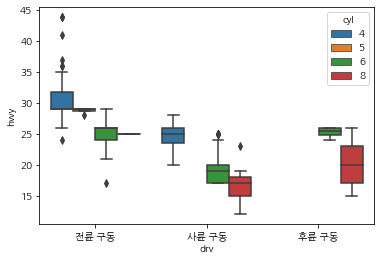

In [40]:
sns.boxplot(x='drv', y='hwy', data=mpg, hue='cyl')

<AxesSubplot:xlabel='drv', ylabel='hwy'>

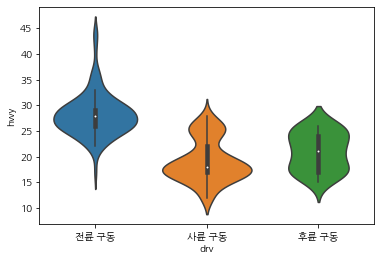

In [41]:
sns.violinplot(x='drv', y='hwy', data=mpg)

<AxesSubplot:xlabel='drv', ylabel='hwy'>

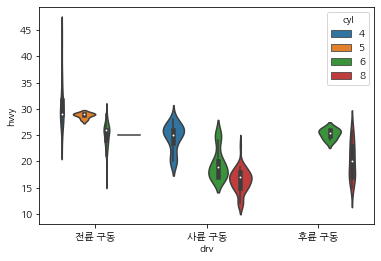

In [42]:
sns.violinplot(x='drv', y='hwy', data=mpg, hue='cyl')

<AxesSubplot:xlabel='drv', ylabel='hwy'>

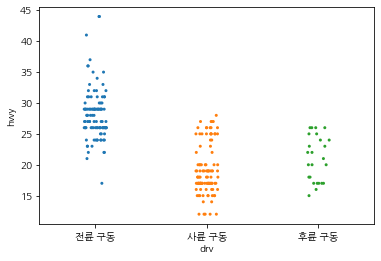

In [43]:
STRIP_SIZE = 3
sns.stripplot(x='drv', y='hwy', data=mpg, jitter=True, size=STRIP_SIZE)

<AxesSubplot:xlabel='drv', ylabel='hwy'>

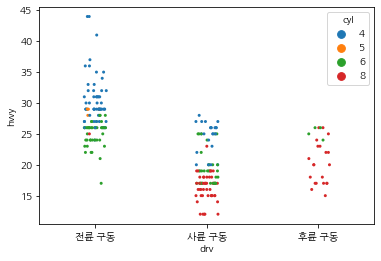

In [44]:
STRIP_SIZE = 3
sns.stripplot(x='drv', y='hwy', data=mpg, hue='cyl', jitter=True, size=STRIP_SIZE)

<AxesSubplot:xlabel='drv', ylabel='hwy'>

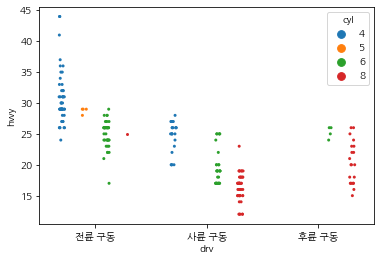

In [45]:
STRIP_SIZE = 3
sns.stripplot(x='drv', y='hwy', data=mpg, hue='cyl', dodge=True, jitter=True, size=STRIP_SIZE)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='drv', ylabel='hwy'>

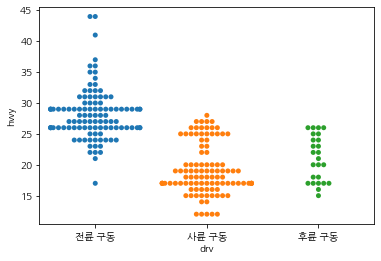

In [46]:
sns.swarmplot(x='drv', y='hwy', data=mpg)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='drv', ylabel='hwy'>

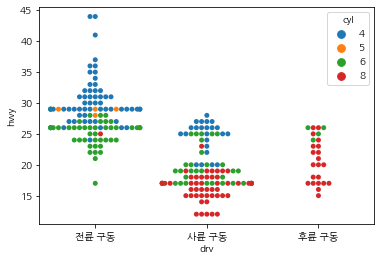

In [47]:
sns.swarmplot(x='drv', y='hwy', data=mpg, hue='cyl')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

<AxesSubplot:xlabel='drv', ylabel='hwy'>

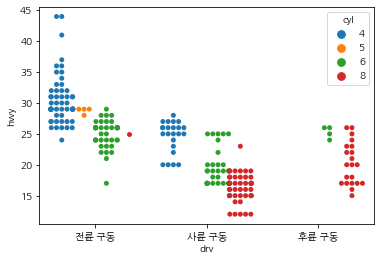

In [48]:
sns.swarmplot(x='drv', y='hwy', data=mpg, hue='cyl', dodge=True)

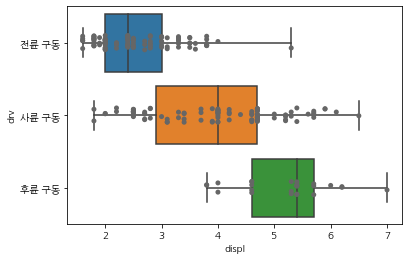

In [52]:
plt.figure()
sns.boxplot(x='displ', y='drv', data=mpg, whis=np.inf)
ax = sns.stripplot(x='displ', y='drv', data=mpg, jitter=True, color='0.4')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


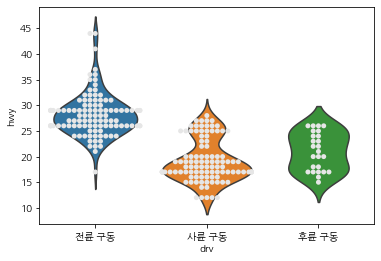

In [57]:
plt.figure()
sns.violinplot(x='drv', y='hwy', data=mpg, inner=None)
ax = sns.swarmplot(x='drv', y='hwy', data=mpg, color='0.9')

In [60]:
def sine_plot(mytitle):
    plt.figure()
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x+i*.5) * (7-i))
    plt.title('style: ' + mytitle)

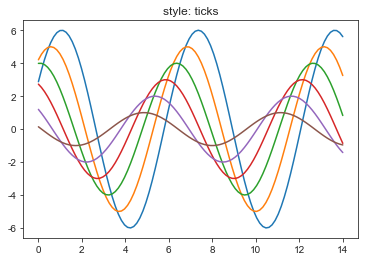

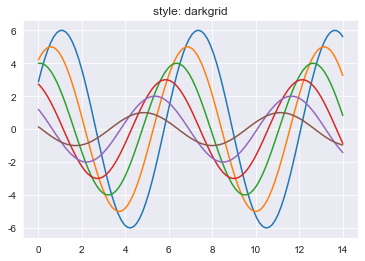

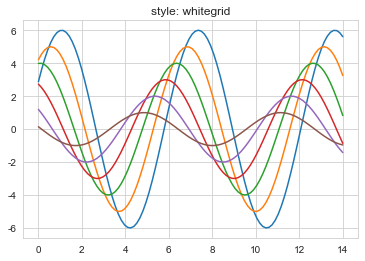

In [61]:
for t in ['ticks', 'darkgrid', 'whitegrid']:
    sns.set_style(t)
    sine_plot(t)